In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns

In [2]:
train = pd.read_csv("./data/spaceship-titanic/train.csv")
test = pd.read_csv("./data/spaceship-titanic/test.csv")
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_df,test_df = split_dataset(train)
train_df.replace({True:1,False:0},inplace=True)
test_df.replace({True:1,False:0},inplace=True)
# print(train_df.columns==test_df.columns)

/tmp/ipykernel_4010/2385381530.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.replace({True:1,False:0},inplace=True)
/tmp/ipykernel_4010/2385381530.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.replace({True:1,False:0},inplace=True)


<AxesSubplot:>

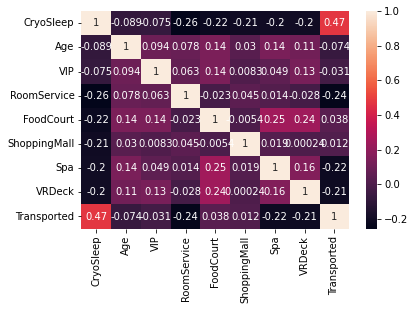

In [4]:
# correlation analysis
corr_df = train_df.corr(method='pearson')
sns.heatmap(data=corr_df, annot=True)

In [7]:
# !pip install tensorflow_decision_forests
import tensorflow_decision_forests as tfdf

label = "Transported"
train_tfdf = tfdf.keras.pd_dataframe_to_tf_dataset(train_df,label=label)
test_tfdf = tfdf.keras.pd_dataframe_to_tf_dataset(test_df,label=label)
model = tfdf.keras.RandomForestModel()
model.fit(train_tfdf)

Use /tmp/tmpho06lur3 as temporary training directory
Reading training dataset...


/home/jhojin/.local/lib/python3.8/site-packages/tensorflow_decision_forests/keras/core.py:2542: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features_dataframe = dataframe.drop(label, 1)
/home/jhojin/.local/lib/python3.8/site-packages/tensorflow_decision_forests/keras/core.py:2542: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features_dataframe = dataframe.drop(label, 1)


Training dataset read in 0:00:00.248059. Found 6115 examples.
Training model...


[INFO kernel.cc:1176] Loading model from path /tmp/tmpho06lur3/model/ with prefix 1e50b95b1c964066


Model trained in 0:00:01.303188
Compiling model...


[INFO abstract_model.cc:1246] Engine "RandomForestOptPred" built
[INFO kernel.cc:1022] Use fast generic engine


Model compiled.


In [8]:
# model.summary()
model.compile(metrics=["accuracy"])
evaluation = model.evaluate(test_tfdf,return_dict=True)
print(evaluation)

3/3 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - accuracy: 0.7983
{'loss': 0.0, 'accuracy': 0.7982932329177856}
